In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [2]:
(x_img_train,y_label_train),(x_img_test,y_label_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
print('train:',len(x_img_train))
print('test:',len(x_img_test))

train: 50000
test: 10000


In [4]:
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
x_img_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [6]:
y_label_train.shape

(50000, 1)

In [7]:
label_dict = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [8]:
import matplotlib.pyplot as plt
def polt_images_labels_prediction(images,labels,prediction,idx,num=10):
  id = 0
  fig = plt.gcf()
  fig.set_size_inches(12,14)
  if num>25 : num=25
  for i in range(0,num):
    ax = plt.subplot(5,5,1+i)
    ax.imshow(images[id],cmap='binary')

    title=str(i)+','+label_dict[labels[i][0]]
    if len(prediction)>0:
      title += '=>' + label_dict[prediction[i]]
    
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]); ax.set_yticks([])
    id+=1

  plt.show()  

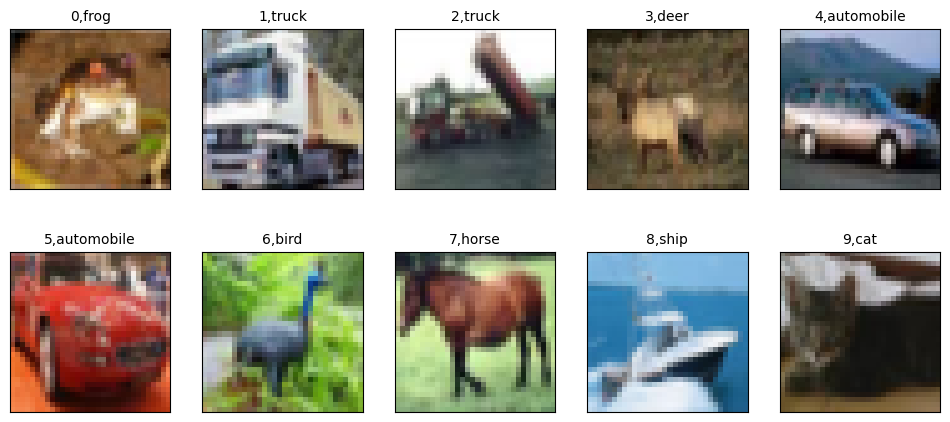

In [9]:
polt_images_labels_prediction(x_img_train,y_label_train,[],0)

In [10]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [11]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [12]:
y_label_train.shape
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [14]:
y_label_train_OneHot.shape

(50000, 10)

In [15]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [17]:
model = Sequential()
model.add(Conv2D(filters = 32,
        kernel_size = (3,3),
        input_shape = (32,32,3),
        activation='relu',
        padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,
        kernel_size = (3,3),
        activation='relu',
        padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(rate = 0.25))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [18]:
model.compile(loss = 'categorical_crossentropy',
            optimizer='adam',
            metrics=['acc'])

In [19]:
train_history = model.fit(x_img_train_normalize,y_label_train_OneHot,
              validation_split=0.2,
              epochs=10,
              batch_size=128,
              verbose=1)

Epoch 1/10
313/313 [==============================] - 171s 541ms/step - loss: 1.5559 - acc: 0.4431 - val_loss: 1.4388 - val_acc: 0.5445
Epoch 2/10
313/313 [==============================] - 159s 506ms/step - loss: 1.2010 - acc: 0.5714 - val_loss: 1.1686 - val_acc: 0.6251
Epoch 3/10
313/313 [==============================] - 163s 520ms/step - loss: 1.0429 - acc: 0.6339 - val_loss: 1.1060 - val_acc: 0.6375
Epoch 4/10
313/313 [==============================] - 163s 520ms/step - loss: 0.9295 - acc: 0.6731 - val_loss: 0.9853 - val_acc: 0.6716
Epoch 5/10
313/313 [==============================] - 167s 534ms/step - loss: 0.8450 - acc: 0.7036 - val_loss: 0.9313 - val_acc: 0.6821
Epoch 6/10
313/313 [==============================] - 160s 511ms/step - loss: 0.7619 - acc: 0.7314 - val_loss: 0.8866 - val_acc: 0.7085
Epoch 7/10
313/313 [==============================] - 159s 506ms/step - loss: 0.6804 - acc: 0.7619 - val_loss: 0.9174 - val_acc: 0.6925
Epoch 8/10
313/313 [============================

In [20]:
model.save("gdrive/My Drive/cnn_first_try.h5")

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.xlabel(train)
  plt.ylabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

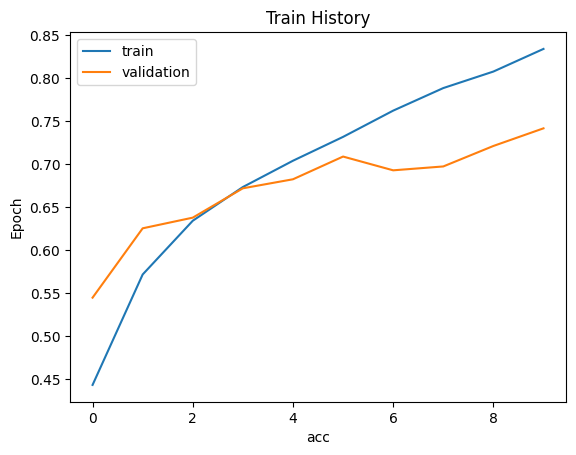

In [22]:
show_train_history(train_history,'acc','val_acc')

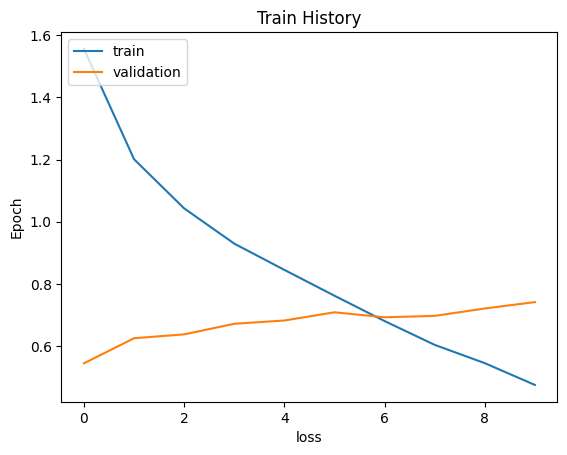

In [23]:
show_train_history(train_history,'loss','val_acc')

In [24]:
scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)
print(scores)

[0.7805564403533936, 0.7311000227928162]


In [25]:
prediction = model.predict(x_img_test_normalize)

313/313 [==============================] - 9s 27ms/step


In [26]:
classes_x=np.argmax(prediction,axis=1)
print(classes_x[:10])

[5 8 8 0 4 6 1 6 3 1]


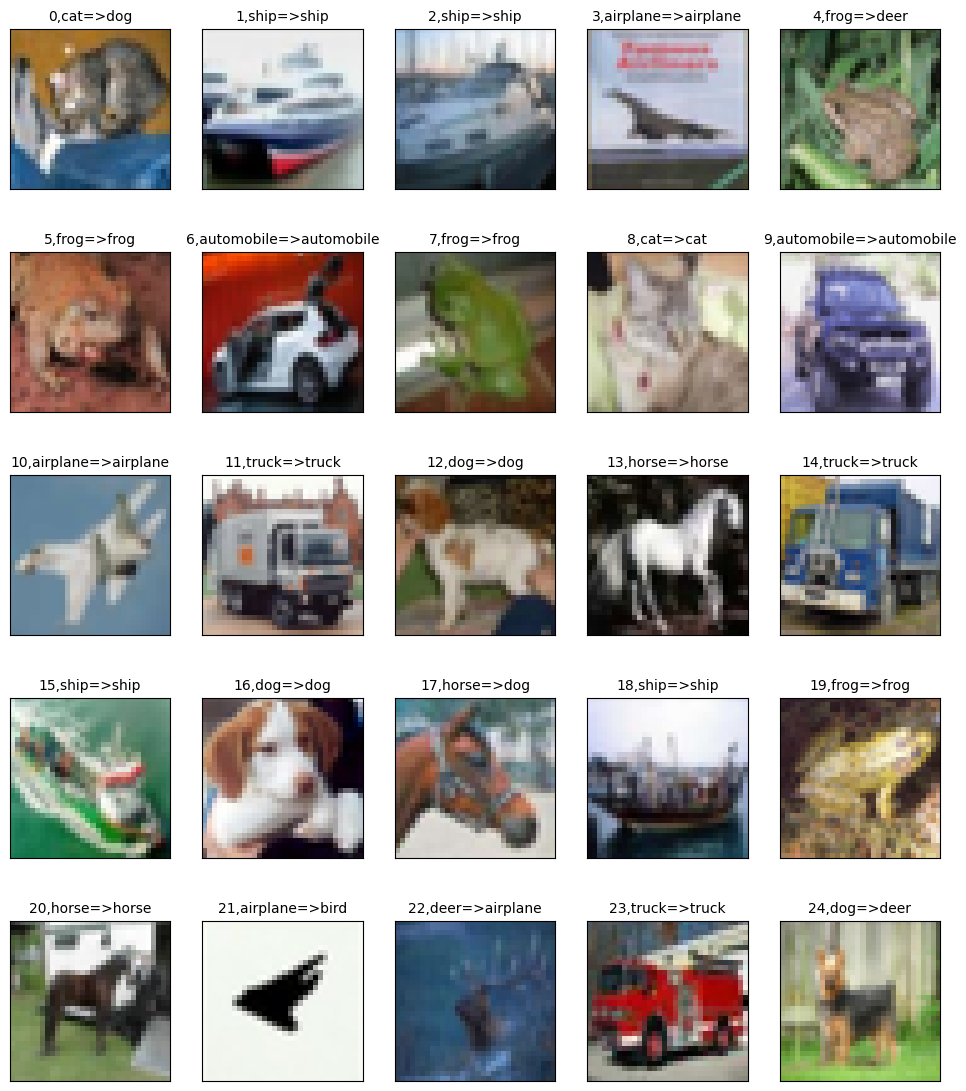

In [27]:
polt_images_labels_prediction(x_img_test,y_label_test,classes_x,0,100)